In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_data.csv')

With three or more dimensions, it becomes harder to visualize the linear trends in our data.

In [3]:
df.head(5)

,title,rated,released,runtime,director,writer,actors,plot,language,country,...,boxoffice,response,genre,star,budget,gross,year,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,Inception,PG-13,2010-07-16,148,Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,"English, Japanese, French","United Kingdom, United States",...,292576195.0,True,Action,Leonardo DiCaprio,160000000.0,836836967.0,2010,8.8,87.0,74.0
1,Iron Man 2,PG-13,2010-05-07,124,Jon Favreau,"Justin Theroux, Stan Lee, Don Heck","Robert Downey Jr., Mickey Rourke, Gwyneth Paltrow",With the world now aware of his identity as Ir...,"English, French, Russian",United States,...,312433331.0,True,Action,Robert Downey Jr.,200000000.0,623933331.0,2010,7.0,72.0,57.0
2,Shutter Island,R,2010-02-19,138,Martin Scorsese,"Laeta Kalogridis, Dennis Lehane","Leonardo DiCaprio, Emily Mortimer, Mark Ruffalo","In 1954, a U.S. Marshal investigates the disap...","English, German",United States,...,128012934.0,True,Mystery,Leonardo DiCaprio,80000000.0,294805697.0,2010,8.2,68.0,63.0
3,Scott Pilgrim vs. the World,PG-13,2010-08-13,112,Edgar Wright,"Michael Bacall, Edgar Wright, Bryan Lee O'Malley","Michael Cera, Mary Elizabeth Winstead, Kieran ...","In a magically realistic version of Toronto, a...",English,"United States, United Kingdom, Canada, Japan",...,32777690.0,True,Action,Michael Cera,60000000.0,48917974.0,2010,7.5,82.0,69.0
4,Grown Ups,PG-13,2010-06-25,102,Dennis Dugan,"Adam Sandler, Fred Wolf","Adam Sandler, Salma Hayek, Kevin James",After their high school basketball coach passe...,"English, Spanish",United States,...,162001186.0,True,Comedy,Adam Sandler,80000000.0,271457301.0,2010,6.0,11.0,30.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   title                           1774 non-null   object 
 1   rated                           1753 non-null   object 
 2   released                        1774 non-null   object 
 3   runtime                         1774 non-null   int64  
 4   director                        1766 non-null   object 
 5   writer                          1771 non-null   object 
 6   actors                          1774 non-null   object 
 7   plot                            1774 non-null   object 
 8   language                        1771 non-null   object 
 9   country                         1773 non-null   object 
 10  awards                          1654 non-null   object 
 11  metascore                       1686 non-null   float64
 12  imdbrating                      17

#### Changing Plot Column to numerical data

In [56]:
df2=df[['rated','runtime' ]]
df2 = df[["rated","star","imdbrating","imdbvotes","genre","rotten_tomato_rating","metacritic_rating"]]

In [57]:
df2.head()

,rated,star,imdbrating,imdbvotes,genre,rotten_tomato_rating,metacritic_rating
0,PG-13,Leonardo DiCaprio,8.8,2223702,Action,87.0,74.0
1,PG-13,Robert Downey Jr.,7.0,771885,Action,72.0,57.0
2,R,Leonardo DiCaprio,8.2,1225928,Mystery,68.0,63.0
3,PG-13,Michael Cera,7.5,409720,Action,82.0,69.0
4,PG-13,Adam Sandler,6.0,242283,Comedy,11.0,30.0


In [70]:
df3 = df2.dropna()

In [71]:
len(df3)

1753

In [72]:
len(df2)

1774

In [73]:
X_dummies = pd.get_dummies(df2)

In [74]:
X_dummies

,imdbrating,imdbvotes,rotten_tomato_rating,metacritic_rating,rated_G,rated_NC-17,rated_Not Rated,rated_PG,rated_PG-13,rated_R,...,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller
0,8.8,2223702,87.0,74.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7.0,771885,72.0,57.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8.2,1225928,68.0,63.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,7.5,409720,82.0,69.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,242283,11.0,30.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,5.8,606,75.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1770,4.7,185,60.0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1771,3.0,145,0.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1772,4.8,1602,0.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


C:\Users\edipa\AppData\Local\Temp/ipykernel_24508/3736610889.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(fig, elev=20, azim=45)


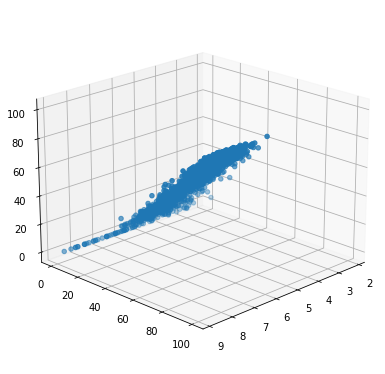

In [75]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter( df["internet_movie_database_rating"], df["rotten_tomato_rating"], df["rotten_tomato_rating"], cmap=plt.cm.get_cmap("Spectral"))
plt.show()

In [76]:
y_label = LabelEncoder().fit_transform(df['internet_movie_database_rating'])
y_label

array([58, 40, 52, ...,  1, 18, 38], dtype=int64)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)

In [78]:
scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [80]:

model.fit(X_train_scaled, y_train)

training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

In [81]:
training_score

0.9999473064653275

In [82]:
testing_score

-1.1539038895570322e+23

In [86]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [87]:
classifier.fit(X_train_scaled, y_train)

C:\Users\edipa\anaconda3\envs\tfenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9157894736842105
Testing Data Score: 0.08108108108108109


In [89]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.061
k: 3, Train/Test Score: 0.371/0.052
k: 5, Train/Test Score: 0.232/0.050
k: 7, Train/Test Score: 0.195/0.036
k: 9, Train/Test Score: 0.161/0.050
k: 11, Train/Test Score: 0.153/0.050
k: 13, Train/Test Score: 0.147/0.050
k: 15, Train/Test Score: 0.144/0.050
k: 17, Train/Test Score: 0.130/0.054
k: 19, Train/Test Score: 0.135/0.047
k: 21, Train/Test Score: 0.130/0.052
k: 23, Train/Test Score: 0.119/0.052
k: 25, Train/Test Score: 0.120/0.050
k: 27, Train/Test Score: 0.115/0.050
k: 29, Train/Test Score: 0.123/0.043
k: 31, Train/Test Score: 0.126/0.041
k: 33, Train/Test Score: 0.135/0.050
k: 35, Train/Test Score: 0.144/0.050
k: 37, Train/Test Score: 0.143/0.054
k: 39, Train/Test Score: 0.150/0.050


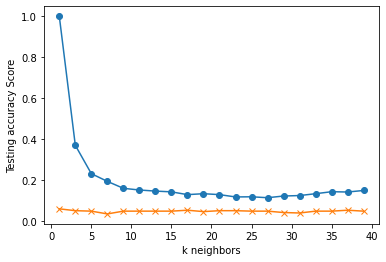

In [95]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [96]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.050


In [98]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [99]:
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.092


In [100]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
#print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.46846846846846846


In [103]:
from sklearn.ensemble import ExtraTreesClassifier

In [105]:
clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
#print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.29504504504504503
